In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import openTSNE

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("df_processed.csv")
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,0,0,120.0,...,126,92.0,17.1,0,1.0,21.0,35.0,40.0,0,1
1,1,30,180,80,89.0,0.9,1.2,0,0,130.0,...,148,121.0,15.8,0,0.9,20.0,36.0,27.0,2,0
2,1,40,165,75,91.0,1.2,1.5,0,0,120.0,...,74,104.0,15.8,0,0.9,47.0,32.0,68.0,0,0
3,1,50,175,80,91.0,1.5,1.2,0,0,145.0,...,104,106.0,17.6,0,1.1,29.0,34.0,18.0,0,0
4,1,50,165,60,80.0,1.0,1.2,0,0,138.0,...,117,104.0,13.8,0,0.8,19.0,12.0,25.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991315,1,45,175,80,92.1,1.5,1.5,0,0,114.0,...,125,132.0,15.0,0,1.0,26.0,36.0,27.0,0,0
991316,1,35,170,75,86.0,1.0,1.5,0,0,119.0,...,84,45.0,15.8,0,1.1,14.0,17.0,15.0,0,0
991317,0,40,155,50,68.0,1.0,0.7,0,0,110.0,...,77,157.0,14.3,0,0.8,30.0,27.0,17.0,2,1
991318,1,25,175,60,72.0,1.5,1.0,0,0,119.0,...,73,53.0,14.5,0,0.8,21.0,14.0,17.0,0,0


## Scaling

In [4]:
y_SMK = df["SMK_stat_type_cd"]
y_DRK = df["DRK_YN"]

y_SMK_male = df[df["sex"] == 1]["SMK_stat_type_cd"]
y_DRK_male = df[df["sex"] == 1]["DRK_YN"]

y_SMK_female = df[df["sex"] == 0]["SMK_stat_type_cd"]
y_DRK_female = df[df["sex"] == 0]["DRK_YN"]

X_male = df.drop(columns=["DRK_YN", "SMK_stat_type_cd"])[df["sex"] == 1]
X_female = df.drop(columns=["DRK_YN", "SMK_stat_type_cd"])[df["sex"] == 0]
X = df.drop(columns=["DRK_YN", "SMK_stat_type_cd"])

scaler = StandardScaler()
X_male = scaler.fit_transform(X_male)
X_female = scaler.fit_transform(X_female)
X = scaler.fit_transform(X)

## Dimensionality reduction

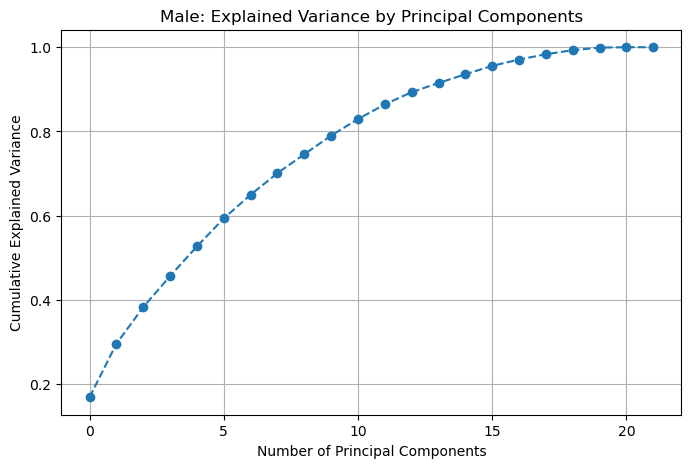

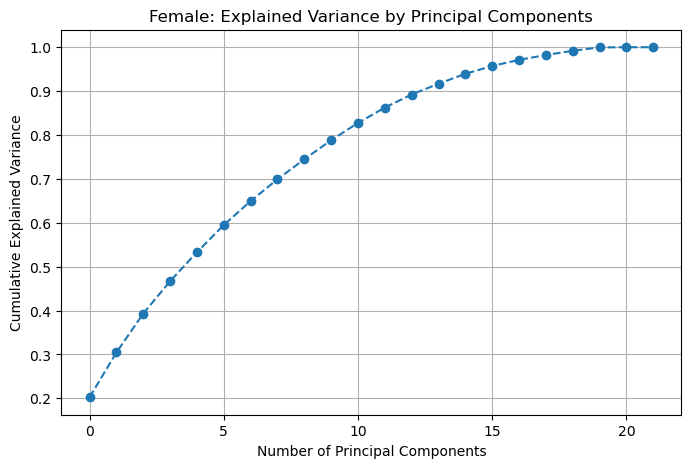

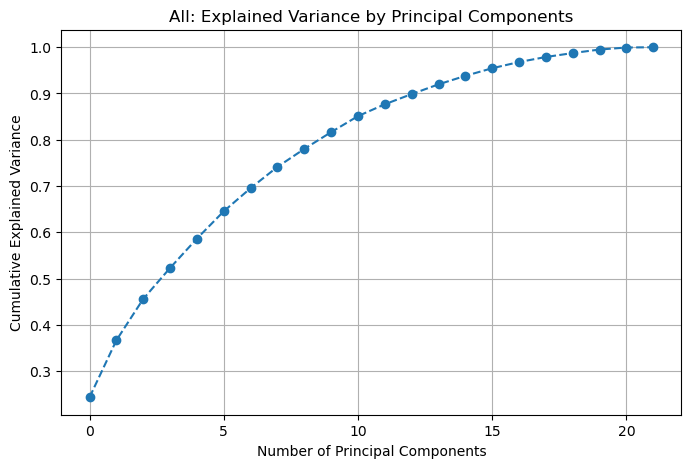

In [9]:
pca = PCA()
X_male_pca_test = pca.fit_transform(X_male)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Male: Explained Variance by Principal Components')
plt.grid(True)
plt.show()

X_female_pca_test = pca.fit_transform(X_female)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Female: Explained Variance by Principal Components')
plt.grid(True)
plt.show()

X_pca_test = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('All: Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# This where we actually create the reduced-dimensionality dataset

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## k-Means

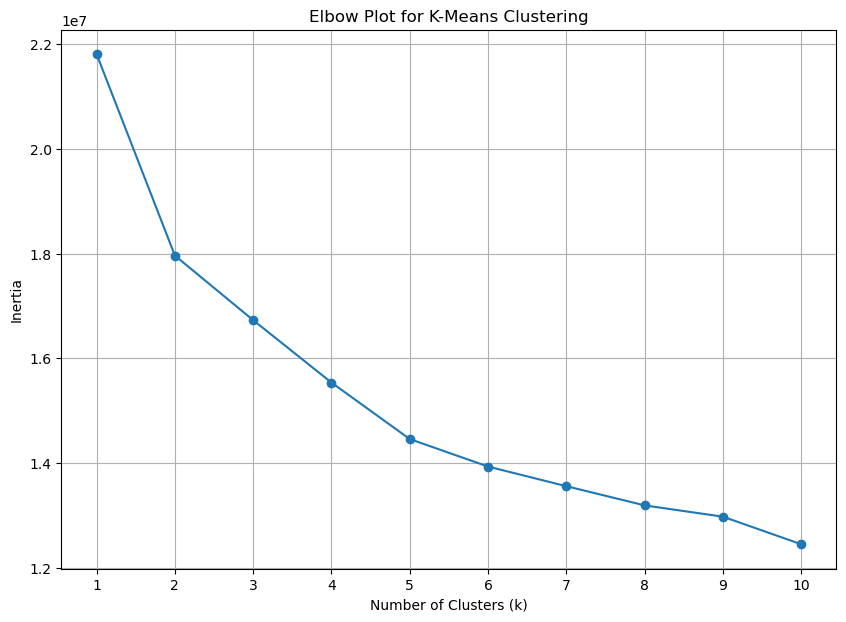

In [6]:
k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=69)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 7))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [44]:
kmeans = KMeans(n_clusters=2, random_state=69)
kmeans.fit(X[:200000])
kmeans_labels = kmeans.labels_
kmeans_centroids = kmeans.cluster_centers_

## TSNE

In [5]:
# tsne = TSNE(n_components=2, random_state=69, perplexity=30, n_iter=250, init="pca")
# X_tsne = tsne.fit_transform(X)

opentsne = openTSNE.TSNE(n_components=2, perplexity=30, n_iter=250, negative_gradient_method="fft", verbose=True)
X_opentsne = opentsne.fit(X[:200000])

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_iter=250, negative_gradient_method='fft',
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 96.33 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.10 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=12.00, lr=16666.67 for 250 iterations...
Iteration   50, KL divergence 7.4551, 50 iterations in 8.6262 sec
Iteration  100, KL divergence 7.4528, 50 iterations in 8.6249 sec
Iteration  150, KL divergence 7.4287, 50 iterations in 8.5856 sec
Iteration  200, KL divergence 7.4178, 50 iterations in 8.5980 sec
Iteration  250, KL divergence 7.4109, 50 iterations in 8.6216 sec
   --> Time elapsed: 43.06 seconds
===> Running optimiz

In [6]:
X_opentsne

TSNEEmbedding([[ 39.5697208 ,  -9.80550371],
               [ 40.8201133 ,  -4.87639652],
               [ 35.11269242,  25.34731018],
               ...,
               [-48.30966203, -23.24460468],
               [-12.05110397,  20.02827417],
               [ 47.77159306, -40.21144274]])

In [45]:
first_200k_sex = df["sex"].iloc[:200000].to_numpy()
first_200k_flipped_sex = 1 - df["sex"].iloc[:200000].to_numpy()

kmeans_labels_male = first_200k_sex * kmeans.labels_
kmeans_labels_female = first_200k_flipped_sex * kmeans.labels_

SMK = df["SMK_stat_type_cd"].to_numpy()
DRK = df["DRK_YN"].to_numpy()

SMK_male = first_200k_sex * SMK[:200000]
SMK_female = first_200k_flipped_sex * SMK[:200000]

DRK_male = first_200k_sex * DRK[:200000]
DRK_female = first_200k_flipped_sex * DRK[:200000]

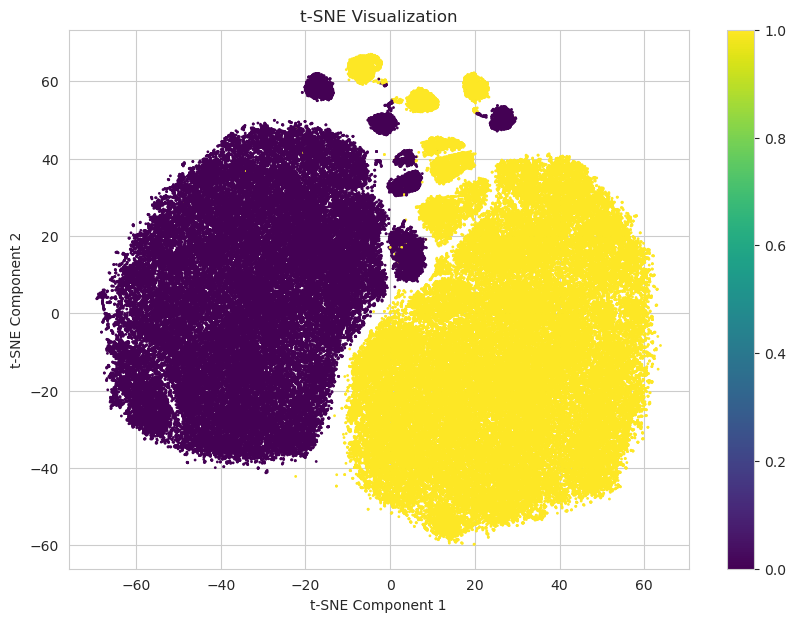

In [46]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=first_200k_sex)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

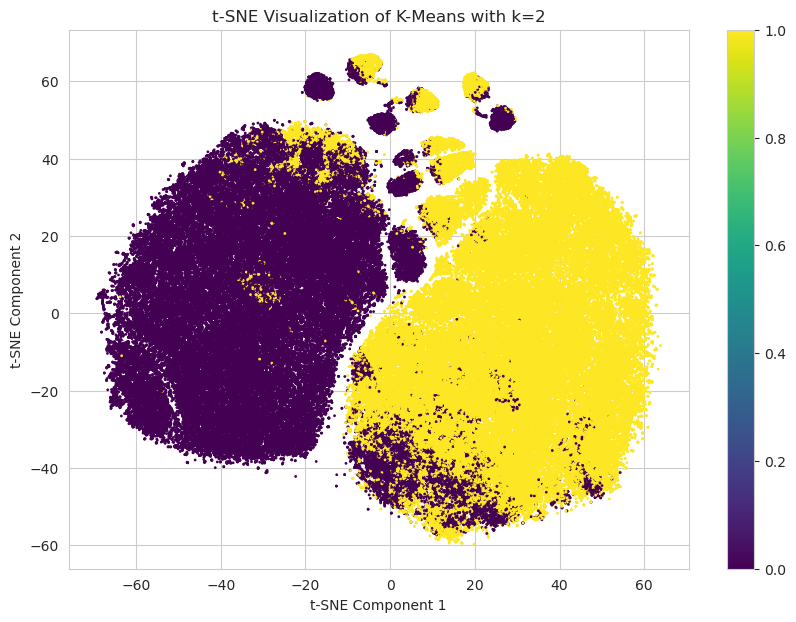

In [50]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=kmeans_labels[:200000])
plt.title('t-SNE Visualization of K-Means with k=2')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

## DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca[:200000])

In [12]:
np.unique(dbscan_labels)

array([-1,  0])

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_opentsne[:, 0], X_opentsne[:, 1], s=1, cmap='viridis', c=dbscan_labels[:200000])
plt.title('t-SNE Visualization of DBCSAN with eps = 1')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.show()

## GMM

In [ ]:
# Using PCA dataset
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X_pca[:200000])

gmm_labels = gmm.predict(X_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=1, cmap='viridis', c=dbscan_labels[:200000])
plt.title('Gaussian Mixture Models (GMM) Clustering Results with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()